## Comparazione modello fatto per il progetto e il modello di pyTorch

In [19]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys
sys.path.append('../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.NeuralNetwork import Layer, NeuralNetwork
from src.function import IdentityFunction

In [20]:
X = torch.rand(10, 2)
y = X*2
learning_rate = 0.01
momentum_term = 0
regularization_term = 0.01

epoch = 200

In [21]:
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2, bias=False)
        self.fc2 = nn.Linear(2, 3, bias=False)
        self.fc3 = nn.Linear(3, 2, bias=False)
        self.fc4 = nn.Linear(2, 2, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

# funzione loss usata nel corso
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, target_output, output_nn):
        error_vector = (target_output - output_nn)**2 / 2
        error_total = error_vector.sum()
        return error_total

# funzione loss usata nel corso
class CustomError(nn.Module):
    def __init__(self):
        super(CustomError, self).__init__()

    def forward(self, target_output, output_nn):
        error_vector = (target_output - output_nn)**2
        error_total = error_vector.sum()
        return error_total

model = Net()


In [22]:
import numpy as np

layer1 = Layer(num_neurons=2, num_inputs=2, activation_function=IdentityFunction())
layer2 = Layer(num_neurons=3, num_inputs=2, activation_function=IdentityFunction())
layer3 = Layer(num_neurons=2, num_inputs=3, activation_function=IdentityFunction())
layer4 = Layer(num_neurons=2, num_inputs=2, activation_function=IdentityFunction())

layer1.weights = np.matrix(model.fc1.weight.detach().numpy()).copy()
layer2.weights = np.matrix(model.fc2.weight.detach().numpy()).copy()
layer3.weights = np.matrix(model.fc3.weight.detach().numpy()).copy()
layer4.weights = np.matrix(model.fc4.weight.detach().numpy()).copy()

neuralNetwork = NeuralNetwork([layer1, layer2, layer3, layer4])
target_inputs =  np.matrix(X.numpy()).copy()
target_outputs = np.matrix(y.numpy()).copy()

In [23]:
neuralNetwork.predict(inputs=target_inputs)

matrix([[ 0.11414043, -0.03290372],
        [ 0.07368932, -0.02075974],
        [ 0.04241682, -0.01262942],
        [ 0.11039996, -0.03231976],
        [ 0.11828432, -0.03373596],
        [ 0.0833695 , -0.0241223 ],
        [ 0.01406215, -0.00189049],
        [ 0.04991046, -0.01469035],
        [ 0.03424016, -0.00836127],
        [ 0.03106779, -0.00900002]])

In [24]:
error_history = neuralNetwork.train(target_inputs, target_outputs, learning_rate=learning_rate,
                                    regularization_term=regularization_term, momentum_term = momentum_term, epochs=epoch)

In [25]:
error_history_torch = []
for _ in range(epoch):
    # Define the loss function
    loss_fn = CustomLoss()
    error_fn = CustomError()

    y_pred = model(X)
    loss = loss_fn(target_output = y, output_nn = y_pred)
    error = error_fn(target_output = y, output_nn = y_pred)
    error_history_torch.append(error.item())

    # l2_reg = 0
    # for param in model.parameters():
    #     l2_reg += (param ** 2).sum()
    #
    # loss = loss + regularization_term*l2_reg

    loss.backward()

    # Manually update the weights
    with torch.no_grad():
        for param in model.parameters():
            param += -(learning_rate * param.grad + 2*regularization_term*param)

    model.zero_grad()

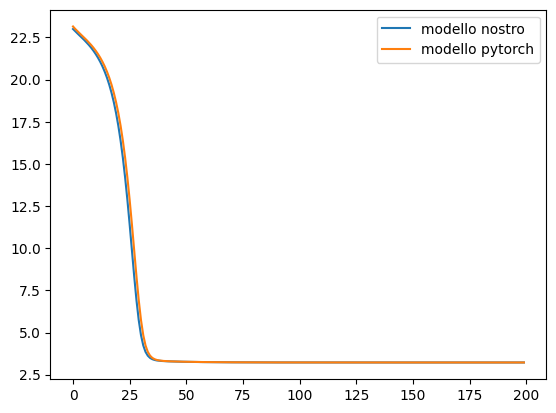

In [26]:
plt.plot(error_history, label='modello nostro')
plt.plot(error_history_torch, label='modello pytorch')
plt.legend()

In [27]:
tolerance = 0.001
# Ci sono delle differenze di approssimazione tra i due modelli
assert np.all(np.abs(np.matrix(layer1.weights) - np.matrix(model.fc1.weight.detach().numpy())) < tolerance)
assert np.all(np.abs(np.matrix(layer2.weights) - np.matrix(model.fc2.weight.detach().numpy())) < tolerance)
assert np.all(np.abs(np.matrix(layer3.weights) - np.matrix(model.fc3.weight.detach().numpy())) < tolerance)
assert np.all(np.abs(np.matrix(layer4.weights) - np.matrix(model.fc4.weight.detach().numpy())) < tolerance)